<a href="https://colab.research.google.com/github/ShilpaVasista/Exploratory-Data-Analytics/blob/main/Simplified_EDA_Lab_8_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download a Twitter dataset containing tweets about a specific brand or event.

  a. Utilize libraries like NLTK or TextBlob to perform sentiment analysis on the
tweets.

  b. Explore the distribution of positive, negative, and neutral sentiment.
  
  c. Identify keywords or phrases associated with each sentiment category.

Program's Role:

- Sentiment Analysis is a text-based EDA tool—it helps quantify subjective opinions (turning text into numbers like polarity scores).

- The sentiment distribution chart shows how opinions are spread (positive/negative/neutral).

- The top word analysis is about identifying key themes/keywords in the text—like basic feature exploration of unstructured data.

Package/Library Used and its Purpose

- pandas
  - Why?
    - To read CSV files and manipulate tabular data easily.
  - Key function used:
    - pd.read_csv() reads data into a DataFrame
    - dropna() cleans missing data.
- textblob
  - Why?
    - It provides a simple API for natural language tasks like sentiment analysis.
  - Key function used:
    - TextBlob(text).sentiment.polarity: Returns a float between -1 (negative) and +1 (positive).
  - Transforms qualitative data (text) into quantitative insight (sentiment score).

- matplotlib.pyplot
  - Why?
    - For basic plotting and visualization.
  -Key function used:
    - plot(kind='bar') plots a simple bar chart.
  - Visualizing data distributions helps spot patterns immediately.

- nltk
    - Why?
      - To get stopwords (common words like "the", "and") that don't carry much meaning and are often filtered out.
  - Preprocessing text is key to extracting meaningful keywords.

- collections.Counter
  - Why?
    - To count word frequencies easily.
  - This identifies the most common terms or features in the text.




What are Stop words?

A stop word is a commonly used word (such as “the”, “a”, “an”, or “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [1]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Step by Step Code Walk Through:
 1. Load dataset

In [7]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
import nltk

df = pd.read_csv("Tweets.csv") #Reads a CSV file into a DataFrame (df).

2. Drop missing values

In [8]:
df.dropna(subset=['airline_sentiment', 'text'], inplace=True) #Drops rows where any column listed is missing.

3. Perform sentiment analysis + labeling

In [9]:
df['sentiment_label'] = df['text'].apply(
    lambda x: 'positive' if TextBlob(x).sentiment.polarity > 0
    else ('negative' if TextBlob(x).sentiment.polarity < 0 else 'neutral')
)

- apply() applies a function to every row.

- lambda is a quick anonymous function.

- For each text, it:

  - Calculates polarity (using TextBlob).
  - Converts the score to a label.



4. Plot sentiment distribution

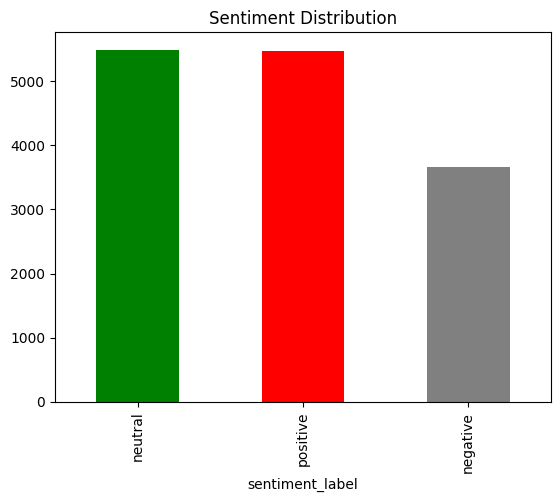

In [10]:
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.show()

5. Get top words

In [11]:
stop_words = set(stopwords.words('english'))

def top_words(series, n=10):
    words = " ".join(series).lower().split()
    words = [w for w in words if w.isalpha() and w not in stop_words]
    return Counter(words).most_common(n)

- " ".join(series) merges all tweets into one long string.

- .lower() standardizes case.

- .split() breaks into words.

- isalpha() filters out numbers/punctuation.




### 🛠 Flow of `top_words`

Pandas Series (collection of tweets/texts)


  ▼

1️⃣ Join all rows into one BIG string

e.g., "I love this phone The phone is great Great battery and great price"

  ▼

2️⃣ Convert to lowercase + split into words

['i', 'love', 'this', 'phone', 'the', 'phone', 'is', 'great', 'great', 'battery', 'and', 'great', 'price']

  ▼

3️⃣ Remove stopwords + non-alphabet words

['love', 'phone', 'phone', 'great', 'great', 'battery', 'great', 'price']

  ▼

4️⃣ Count word frequency

Counter({

  'great': 3,

  'phone': 2,

  'love': 1,

  'battery': 1,

  'price': 1

})

  ▼

5️⃣ Return top N (e.g., 3)
  
  [('great', 3), ('phone', 2), ('love', 1)]



6. Loop to print top words

In [12]:
for sentiment in ['positive', 'negative', 'neutral']:
    print(f"\nTop words in {sentiment.capitalize()} Tweets:")
    print(top_words(df[df['sentiment_label'] == sentiment]['text']))



Top words in Positive Tweets:
[('flight', 1039), ('thanks', 619), ('get', 450), ('thank', 304), ('would', 284), ('fly', 282), ('cancelled', 277), ('great', 261), ('service', 251), ('customer', 242)]

Top words in Negative Tweets:
[('flight', 987), ('late', 341), ('get', 339), ('cancelled', 303), ('customer', 286), ('service', 273), ('hours', 206), ('worst', 195), ('due', 175), ('still', 168)]

Top words in Neutral Tweets:
[('flight', 1191), ('get', 540), ('cancelled', 467), ('hold', 276), ('thank', 257), ('still', 248), ('need', 248), ('please', 243), ('help', 241), ('us', 211)]
